# # ML Project on Stroke Data

## 1) Problem statement

In this project,a stroke data set is used, indicating whether or not a particular person has stroke or not. We will try to create a model that will predict whether or not they will have a stroke based off the features of that person.

- This data set contains 11 columns and 29065 rows

### Importing Libraries

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading the csv data into a DataFrame

In [80]:
df = pd.read_csv('data/stroke_data.csv')

#### Show top 5 records

In [81]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


#### Show dataset information

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29065 non-null  object 
 1   age                29065 non-null  float64
 2   hypertension       29065 non-null  int64  
 3   heart_disease      29065 non-null  int64  
 4   ever_married       29065 non-null  object 
 5   work_type          29065 non-null  object 
 6   Residence_type     29065 non-null  object 
 7   avg_glucose_level  29065 non-null  float64
 8   bmi                29065 non-null  float64
 9   smoking_status     29065 non-null  object 
 10  stroke             29065 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.4+ MB


#### check if data has missing values or duplicates

In [83]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [84]:
df.duplicated().sum()

0

#### Check statistics of the data

In [85]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000
mean,47.676174,0.111509,0.052159,106.405639,30.054684,0.018854
std,18.732941,0.314766,0.222351,45.272453,7.193951,0.136013
min,10.000000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,32.000000,0.000000,0.000000,77.630000,25.000000,0.000000
50%,48.000000,0.000000,0.000000,92.130000,28.900000,0.000000
75%,62.000000,0.000000,0.000000,113.910000,33.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,92.000000,1.000000


#### Find the numerical and categorical features of the dataset

In [86]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


#### Check the number of unique values and different types for all the categorical features

In [87]:
print("Number of unique values in 'gender' variable: ",end=" " )
print(df['gender'].nunique())

print("Number of unique values in 'ever_married' variable: ",end=" " )
print(df['ever_married'].nunique())

print("Number of unique values in 'work_type' variable: ",end=" " )
print(df['work_type'].nunique())

print("Number of unique values in 'Residence_type' variable: ",end=" " )
print(df['Residence_type'].nunique())

print("Number of unique values in 'smoking_status' variable: ",end=" " )
print(df['smoking_status'].nunique())

Number of unique values in 'gender' variable:  2
Number of unique values in 'ever_married' variable:  2
Number of unique values in 'work_type' variable:  5
Number of unique values in 'Residence_type' variable:  2
Number of unique values in 'smoking_status' variable:  3


In [88]:
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'ever_married' variable: ",end=" " )
print(df['ever_married'].unique())

print("Categories in 'work_type' variable: ",end=" " )
print(df['work_type'].unique())

print("Categories in 'Residence_type' variable: ",end=" " )
print(df['Residence_type'].unique())

print("Categories in 'smoking_status' variable: ",end=" " )
print(df['smoking_status'].unique())

Categories in 'gender' variable:  ['Male' 'Female']
Categories in 'ever_married' variable:  ['Yes' 'No']
Categories in 'work_type' variable:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Categories in 'Residence_type' variable:  ['Urban' 'Rural']
Categories in 'smoking_status' variable:  ['never smoked' 'formerly smoked' 'smokes']


#### Check value counts for each of the categories

In [89]:
df['gender'].value_counts()

Female    17852
Male      11213
Name: gender, dtype: int64

In [90]:
df['ever_married'].value_counts()

Yes    21687
No      7378
Name: ever_married, dtype: int64

In [91]:
df['work_type'].value_counts()

Private          18950
Self-employed     5204
Govt_job          4195
children           615
Never_worked       101
Name: work_type, dtype: int64

In [92]:
df['Residence_type'].value_counts()

Urban    14592
Rural    14473
Name: Residence_type, dtype: int64

In [93]:
df['smoking_status'].value_counts()

never smoked       15746
formerly smoked     7093
smokes              6226
Name: smoking_status, dtype: int64

## Exploring Data (Visualization)

In [94]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


### Univariate Analysis

#### Distribution of the 'stroke' variable

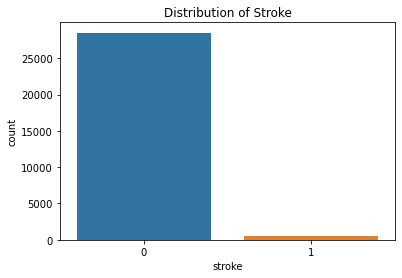

In [95]:
sns.countplot(data=df, x='stroke')
plt.title('Distribution of Stroke')
plt.show()

#### Categorical variables distribution

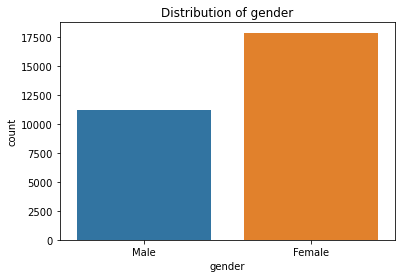

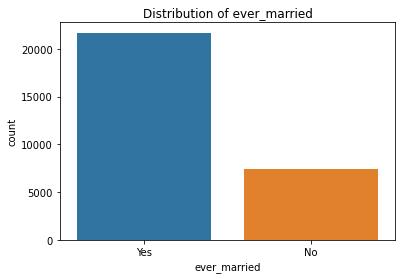

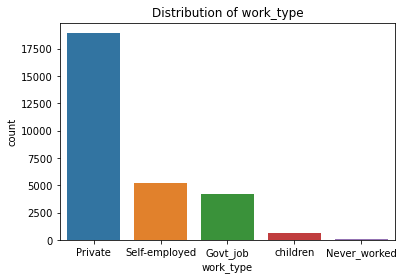

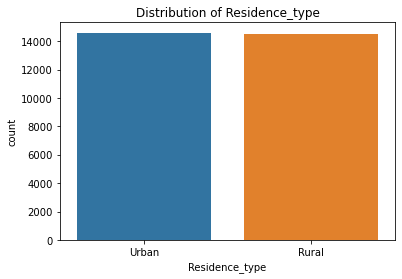

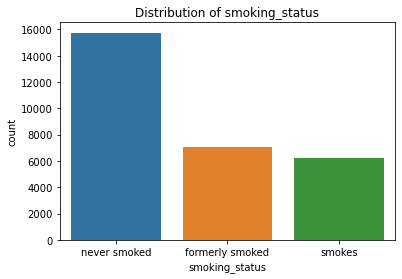

In [96]:
for col in categorical_features:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Distribution of numerical variables

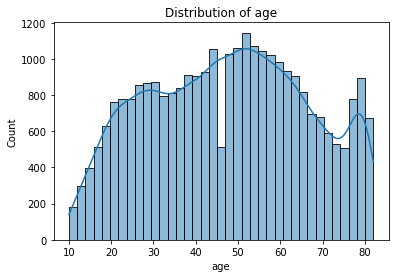

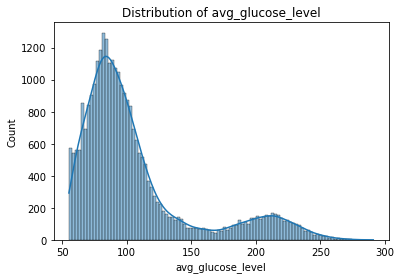

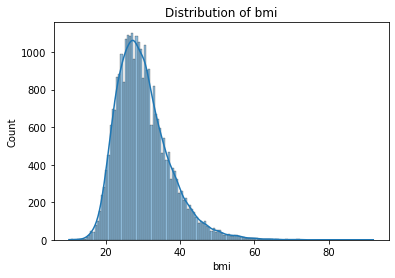

In [97]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Bivariate Analysis

#### Stroke vs Categorical Variables

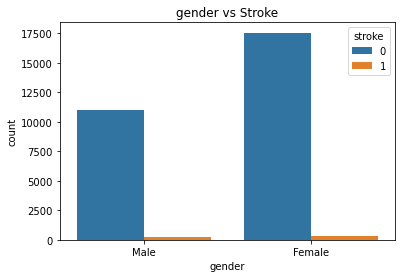

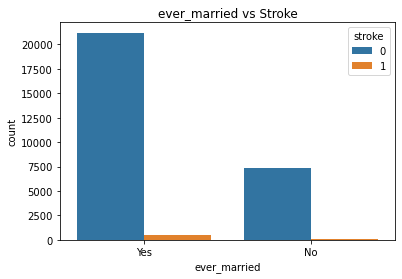

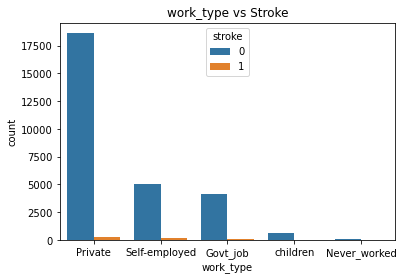

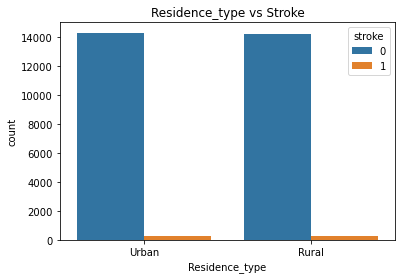

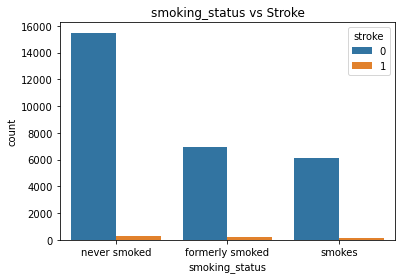

In [98]:
for col in categorical_features:
    plt.figure()
    sns.countplot(data=df, x=col, hue='stroke')
    plt.title(f'{col} vs Stroke')
    plt.show()

#### Stroke vs Numerical Variables

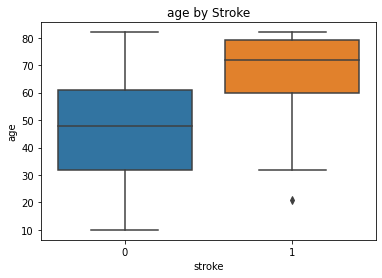

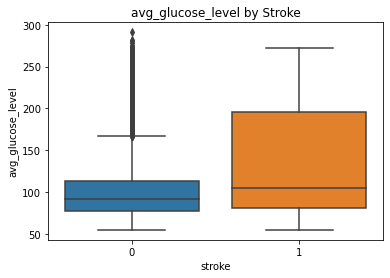

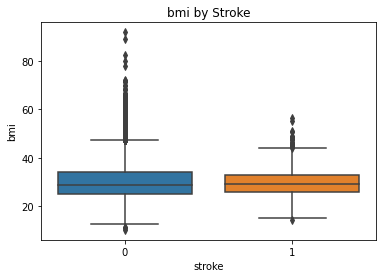

In [99]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=df, x='stroke', y=col)
    plt.title(f'{col} by Stroke')
    plt.show()

#### Pairwise relationships among numerical features

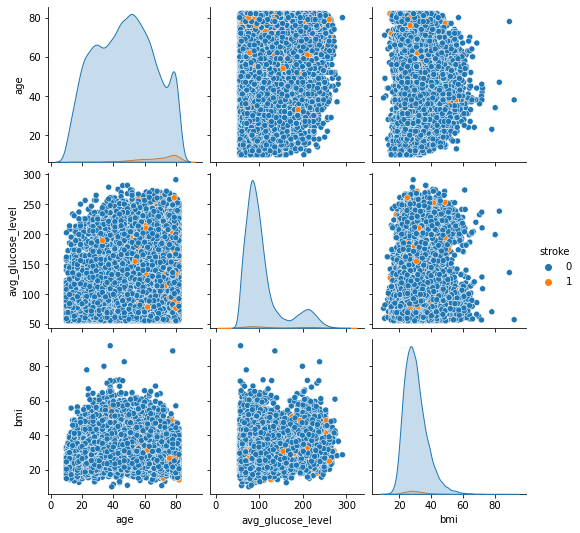

In [100]:
sns.pairplot(data=df, hue='stroke', vars=numerical_cols)

#### Feature Engineering 

Creating a new column for age groups and analyzing them

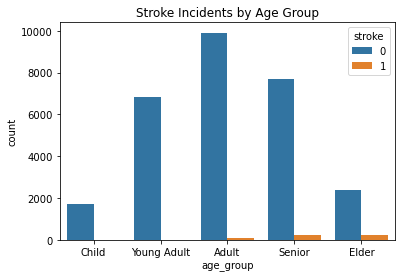

In [101]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 55, 75, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior', 'Elder'])
sns.countplot(data=df, x='age_group', hue='stroke')
plt.title('Stroke Incidents by Age Group')
plt.show()

In [102]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,Senior
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,Senior
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,Adult
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,Senior
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,Young Adult


### Insights and Conclusion
 - The initial count plot shows the proportion of people with and without stroke. This can give you a sense of class balance in the dataset.
 - By analyzing the distribution of gender across the dataset and within the stroke class, you can understand if there's a gender bias in stroke incidence.
 - The analysis of age groups in relation to stroke suggests whether stroke is more prevalent in certain age brackets.
 -  Analyzing stroke distribution by work_type and Residence_type could reveal correlations with lifestyle or environment.